# Principal Component Analysis (PCA)
- `PCA` is widely used technique for dimensionality reduction of the large data set.
- Reducing the number of components or features costs some accuracy and on the other hand, it makes the large data set simpler, easy to explore and visualize.
- Additionally, PCA reduces the computational complexity of the model which makes machine learning algorithms run faster.

## Steps involved in PCA
1. Standardize the data. (with mean=0 and variance=1).
2. Compute the covariance matrix of dimensions.
3. Obtain the Eigenvectors and Eigenvalues from the covariance matrix (can also be used correleation matrix or singular value decomposition).
4. Sort eigenvalues in descending order and choose the top k Eigenvectors that correspond to the k larges Eigenvalues (k will become the number of dimensions of the new feature subspace k<=d, d is the number of original dimension).
5. Construct the projection matrix W from the selected k Eigenvectors.
6. Transform the original data set X via W to obtain the new k-dimensional feature subspace Y.

In [1]:
# Import
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist
%matplotlib inline

In [65]:
# Load datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Training Data: (60000, 28, 28)
Training Labels: (60000,)
Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


## 1. Standardization
- Indorder to avoid biased result standardization is essential.
- So we use standardization to bring the features with mean value 0 and variance 1.
- Mnist datasets contains grayscale image so dividing by 255. helps to standardize

In [79]:
# Preprocessing the image

# Convert each images to one-dimensional
X = x_train.reshape(x_train.shape[0], -1)

# Normalize the data, each data in range[0-1]
X = X.astype(float)/255.

print(f"X shape: {X.shape}") # each row represents different digits

X shape: (60000, 784)


## 2. Eigen Decomposition-- Computing Eigenvalues and Eigenvectors
- The eigenvectors and eigenvalues of the covariance(or correlation) matrix represents the core of a PCA.
- The eigenvectors (principal components) determine the direction of new feature space, and the eigenvalues determine their magnitude
- In other words, the eigenvalues explain the variance of the data along the new feature axis. It means the corresponding eigenvalue tells us that how much variance is included in that new transformed feature.
- To get eigenvalues and eigenvectors we need to compute the covariance matrix.

## 2.1 Covariance Matrix
- The classic approach of PCA is to perform the Eigen decomposition on the covariance matrix, which is dxd matrix where each element represents the covariance between two features.
- Here, d is the number of original dimensions of the data set.
- **Example:** In Mnist datasets there are 784 features hence covariance matrix will be of order 784x784

In [67]:
# Covariance matrix using numpy
cov_mat = np.cov(X, rowvar=False)
cov_mat.shape

(784, 784)

In [69]:
# Covariance matrix without numpy
mean_vec = np.mean(X, axis=0)
cov_mat = (X-mean_vec).T.dot((X-mean_vec))/(X.shape[0]-1)
cov_mat.shape

(784, 784)

## 2.2 Eigenvectors and Eigenvalues computation from the covariance matrix
- Now we can calculate Eigenvectors and Eigenvalues of the covariance matrix using the concept from Linear Algebra
- Here, let's calculate Eigenvectors and Eigenvalues using numpy

In [70]:
# Compute Eigenvectors and Eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_mat) 

print(f"Eigen values shape: {eig_vals.shape}")
print(f"Eigen vectors shape: {eig_vecs.shape}")

Eigen values shape: (784,)
Eigen vectors shape: (784, 784)


## 2.3 Eigen Vectors Verification
- The sum of square of each value in an Eigenvector is 1.

In [71]:
sum_sq_eig = np.sum(eig_vecs**2, axis=1)
sum_sq_eig[:5]

array([1., 1., 1., 1., 1.])

## 3. Selecting The Principal Components
- The goal of PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes.
- However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1.
- So now the question comes that how to select the new set of Principal components?.
- The rule behind is that we sort the Eigenvalues in descending order and the choose the top k features concerning top k Eigenvalues.
- The idea here is that by choosing top k we have decided that the variance which corresponds to those k feature space is enough to describe the dataset.
- And by losing the remaining variance of those not selected features, won't cost the accuracy much or we are OK to loose that much accuracy that costs because of neglected variance.

## 3.1 Sorting eigenvalues
- To decide which Eigenvectors can be dropped without loosing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues:
   - The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
   - To do so, the common approach is to rank the eigenvalues from the highest to lowest to choose the top k Eigenvectors.

In [72]:
#Make a list of (eigenvalue, eigenvector) tuples 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))] 

#Sort the (eigenvalue, eigenvector) tuples from high to low 
eig_pairs.sort(key=lambda x:x[0], reverse=True) 

#Visually confirm that the list is correctly sorted by decreasing eigenvalues 
print('\n\n\nEigenvalues in descending order:') 
for i in eig_pairs: 
    print(i[0])




Eigenvalues in descending order:
5.116873009558912
3.741390835378752
3.252708451492015
2.8416206976115186
2.5671177441085264
2.2736633860103845
1.725154982111232
1.520560240324296
1.456305252641909
1.2427500889188097
1.1120895080287412
1.0666405432780173
0.9046808327483568
0.8921812228637236
0.8323530480397592
0.7819003233688819
0.6983868713000022
0.6732558113274739
0.6259952395755571
0.6077630200674473
0.562145880220821
0.5307988293548579
0.5027802547225572
0.48114703293426714
0.46578320029933623
0.44253869050902594
0.42843960637858
0.41461870729268807
0.3926673369932344
0.364261791308748
0.34698595830021983
0.34174189019122636
0.31773428411927734
0.30928082143670294
0.30054903382425313
0.28663271231176984
0.2666805122364866
0.257227909048059
0.2538380219070073
0.24900673828236572
0.24082398989098813
0.2345438541513431
0.22065865198389242
0.20996267805145366
0.20298138139564192
0.1977766901942434
0.1908724767444652
0.1853797151678439
0.17929879766601214
0.16971125552765223
0.168204

## 4. Construct the projection matrix W from the selected k eigen vectors
- Projection matrix will be used to transform the Mnist data onto the new feature subspace or say newly transformed dataset with reduced dimensions.
- It is a matrix of our concatenated top K Eigenvectors.
- Here we are reducing 784 dimensional feature space to `3 dimensional feature` subspace by choosing the `top 3` Eigenvectors with the highest Eigenvalues to construct dxk dimensional Eigenvector matrix W. (eg. 784x3)

In [73]:
# Construct Projection matrix W using top 3 Eigen vectors from eig_pairs
# numpy.hstack: Stack arrays in sequence horizontally (column wise)
proj_matrix_w = np.hstack((eig_pairs[0][1].reshape(784, 1), eig_pairs[1][1].reshape(784, 1), eig_pairs[2][1].reshape(784, 1)))
print('Projection Matrix W Shape:\n', proj_matrix_w.shape)

Projection Matrix W Shape:
 (784, 3)


## 5. Projection Onto the New Feature Space
- In this last step we will use the `784x3 dimensioanl projection matrix W` to transform our samples onto the new subspace via the equation `Y=XxW`, where the output Y will be a `60000x2` matrix of our transformed samples. 

In [78]:
# Projection to span of top 3 Eigenvectors
Y = X.dot(proj_matrix_w)

# Create dataframe 
principal_df = pd.DataFrame(data=Y, columns = ['principal_component_1', 'principal_component_2', 'principal_component_3'])

# Add target class to the dataframe
principal_df["labels"] = y_train

principal_df.head()

,principal_component_1,principal_component_2,principal_component_3,labels
0,-3.453849,-1.293925,0.774927,5
1,-6.935362,-1.224053,3.209647,0
2,-2.764507,1.470183,0.131806,4
3,0.165993,-2.448917,1.944202,1
4,-1.466839,2.797123,0.935193,9


## Visualize 3D Projection
- Use a PCA projection to visualize the entire dataset

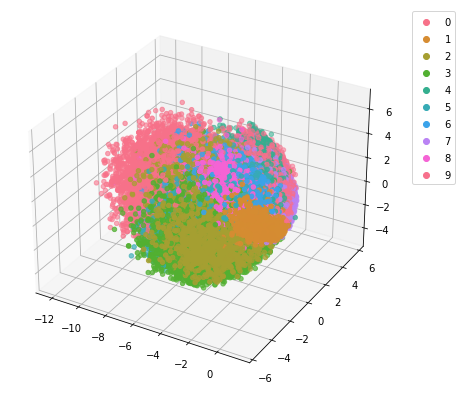

In [102]:
from matplotlib.colors import ListedColormap

# Extract columns from the dataframe
principal_component_1 = np.array(principal_df['principal_component_1'])
principal_component_2 = np.array(principal_df['principal_component_2'])
principal_component_3 = np.array(principal_df['principal_component_3'])
labels = np.array(principal_df['labels'])

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# Initialize figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(principal_component_1, principal_component_2, principal_component_3, c=labels, marker='o', cmap=cmap)

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

# References
1. https://medium.com/analytics-vidhya/dimensionality-reduction-using-principal-component-analysis-pca-41e364615766
2. https://towardsdatascience.com/a-complete-guide-to-principal-component-analysis-pca-in-machine-learning-664f34fc3e5a
3. https://www.youtube.com/watch?v=Bt4zfx2R9vA&ab_channel=ExploringtheMeaningOfMath
4. https://stattrek.com/matrix-algebra/covariance-matrix.aspx